## COVID HACKATHON NOTEBOOK

**Jackson Rudoff**

March 13, 2023

Our task for this week is do some predictions from X-ray data. We know a few things about it going in, mainly that there are three possible prediction categories, and that COVID positivity will be involved. So let's read in the data and see what we're working with; we're going to use the same pre-processing instructions that were shown in class for this.

In [10]:
#!unzip "data\COVID-19_Radiography_Dataset.zip"

In [12]:
### Load Libraries

# Load libraries and then download data

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D


In [13]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID\\images', 'Normal\\images', 'Viral Pneumonia\\images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-10.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-100.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1000.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1001.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1002.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1003.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1004.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1005.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1006.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1007.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1008.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1009.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-101.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1010.png', 'COV

In [15]:
fnames[0]=fnames[0][0:1344]
fnames[1]=fnames[1][0:1344]
fnames[2]=fnames[2][0:1344]

print(fnames[0])

['COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-10.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-100.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1000.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1001.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1002.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1003.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1004.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1005.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1006.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1007.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1008.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1009.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-101.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1010.png', 'COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1011.png'

In [16]:
from src.preprocessor import preprocessor # I exported the module locally

#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [17]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder 
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4027,0,0,1
4028,0,0,1
4029,0,0,1
4030,0,0,1


So, we now have our data pre-processed and ready to go. With this setup in place, lets get a feel for what we're attempting to classify, COVID positivity. First, let's establish baseline what the difference between our three categories (`COVID Positive`, `Normal`, `Viral Pneumonia`). We'll set this up to randomly select from the dataset to make sure we can get lots of different comparisons and get an idea for how challenging this task will really be. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


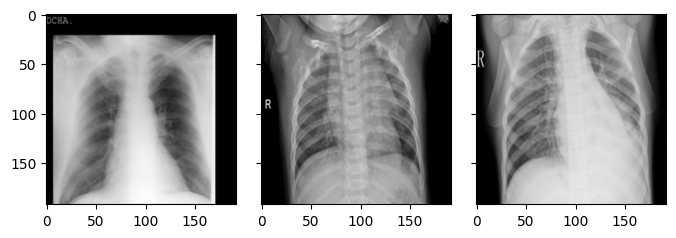

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor(fnames[0][random.randint(0, 1344)])
im2 =preprocessor(fnames[1][random.randint(0, 1344)])
im3 =preprocessor(fnames[2][random.randint(0, 1344)])

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

So, as we toggle through these, a few things are clear. One, some of the images are *not*. Scrolling through, it can be difficult to see differences between even the normal lungs and the other categories, much less the differences between COVID and viral pneumonia.

This exemplifies the utility of creating this model. Health systems are already overloaded, particularly those who may not have access to an abundance of radiologists or pulmanologists. During the peak of the pandemic, there was so much novel image and diagnostic data that practitioners had never encountered before. Setting up this kind of classification model, beyond being used as a diagnostic tool, can also serve as a means of learning more about the key features of different classification categories, as well as the minute distinctions between them. Particularly when speed and accuracy are essential, having a tool to distinguish between more common pulmonary conditions and a newer, potentially less treatable affliction can assist practitioners in regions that need quicker x-ray processing turnaround time; or, now that the pandemic is slowing down, this could help diagnosticians with catching cases that were not being tested for or had been pre-emptively ruled out. What this model generally does is provide a deeper, less human-oriented framework for radiological testing, with the potential for perhaps greater precision with enough training. This model could, with enough data and post-hoc analysis, allow users to improve understanding of the distinguishing features between COVID-positive lungs and pneumonia-afflicted lungs. 

With this in mind, let's get our data split, offloaded, and start running some models.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


X_test.shape, y_test.shape


#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

#Save data
import pickle

# Open a file and use dump()
with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

#Save data
import pickle

# Open a file and use dump()
with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)


# Open a file and use dump()
with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [19]:
del(X)
del(y)
del(preprocessed_image_data)

In [20]:
import pickle
  
with open('X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)


with open('y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)

# Make sure Keras can see my GPU
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Let's make a fairly basic Functional model to begin. We'll base it off of the example we ran in class, but simplify thinks a little bit. I'm also going to swap the `MaxPooling` layers with `AveragePooling` layers to see if this incurs a noticeable performance gain or loss. I know most models are built on `MaxPooling`, but I want to experiment here while I have the chance. I am especially curious to see if it is less susceptible to overfitting and provides better generalization to our test data.  

For our hyperparameters, I'm going to run 10 epochs, keeping batch size and learning rate at the defaults for now. After we see how this one performs, we'll begin experimenting with these to see how they can incur improvements even in a relatively model architecture. For now, let's see what we're working with:

In [21]:
import tensorflow as tf

tf.keras.backend.clear_session()
# Input layer
inputs = tf.keras.layers.Input(shape=(192, 192, 3))

# Set up model
x = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(inputs)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu')(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu')(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu')(x)

x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
model_one = tf.keras.Model(inputs=inputs, outputs=outputs, name = "Basic_First_Model")


# Check out the model
model_one.summary()

Model: "Basic_First_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 32)      1056      
                                                                 
 average_pooling2d (AverageP  (None, 96, 96, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        4160      
                                                 

And let's run it:

In [22]:
tf.keras.backend.clear_session() # make sure there aren't values cached on re-runs, since this caused issues previously

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

    model_one = tf.keras.Model(inputs=inputs, outputs=outputs)

    model_one.compile(
        optimizer="adam",  # to use callback set lr arg such as Adam(lr=0.001) instead
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Fitting the CNN to the Training set
    model_one.fit(
        X_train, y_train,
        epochs=10,
        verbose=1,
        validation_split=.2,
        batch_size = 32,
        use_multiprocessing=True  # , callbacks=[red_lr]) for callback that automatically adjusts lr
    )

Epoch 1/10
69/69 [==============================] - 11s 55ms/step - loss: 0.7381 - accuracy: 0.6601 - val_loss: 0.5686 - val_accuracy: 0.7778
Epoch 2/10
69/69 [==============================] - 3s 44ms/step - loss: 0.5380 - accuracy: 0.7746 - val_loss: 0.4246 - val_accuracy: 0.8124
Epoch 3/10
69/69 [==============================] - 3s 45ms/step - loss: 0.3875 - accuracy: 0.8358 - val_loss: 0.4982 - val_accuracy: 0.7942
Epoch 4/10
69/69 [==============================] - 3s 45ms/step - loss: 0.3877 - accuracy: 0.8303 - val_loss: 0.3767 - val_accuracy: 0.8525
Epoch 5/10
69/69 [==============================] - 3s 45ms/step - loss: 0.2799 - accuracy: 0.8919 - val_loss: 0.3851 - val_accuracy: 0.8506
Epoch 6/10
69/69 [==============================] - 3s 45ms/step - loss: 0.2312 - accuracy: 0.9074 - val_loss: 0.3402 - val_accuracy: 0.8725
Epoch 7/10
69/69 [==============================] - 3s 45ms/step - loss: 0.1771 - accuracy: 0.9284 - val_loss: 0.4295 - val_accuracy: 0.8597
Epoch 8/10
6

Before we submit let's take stock from what we have. It appears that the model actually converged quite well going into `Epoch 6`, but then stagnated with its generalization on 8th run, settling in around 87% validation accuracy. This is also a great lesson in the trade-off between epochs and overall performance. Though internal `loss` and `accuracy` improved dramatically, our `val` metrics stagnated. So, even if we stacked 10 more runs into this model, we would likely get marginal returns in our external performance, meaning it would probably be more worthwhile to look elsewhere for more efficient methods of tuning it. 

If we use the `evaluate()` built-in, we can get a better idea of where things stand. 

In [23]:
# Load our stored test data objects

with open('X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)


with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)


In [24]:
# Get evaluation metrics

test_scores = model_one.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

41/41 - 1s - loss: 0.3659 - accuracy: 0.8745 - 818ms/epoch - 20ms/step
Test loss: 0.365894615650177
Test accuracy: 0.8745158910751343


I will say that 87% is still pretty good for a first model, particularly one that had relatively little tuning. This means we do have a lot of immediate options for improvement before we get into transfer learning. In the meantime, let's get this formatted for submission.

In [25]:
# Get everything saved to onnx

import aimodelshare as ai

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model_one, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("basic_first_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

# Set credentials

apiurl='https://bb4mkgq8sb.execute-api.us-east-2.amazonaws.com/prod/m'

import aimodelshare as ai
experiment= ai.Experiment(apiurl)

from aimodelshare.aws import set_credentials
set_credentials(apiurl=apiurl)

AI Model Share login credentials set successfully.


In [ ]:
# Set up labels

prediction_column_index=model_one.predict(X_test).argmax(axis=1)

# Extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model to Leaderboard
experiment.submit_model(model_filepath = "basic_first_model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

In [27]:
leaderboard = experiment.get_leaderboard()

# Return leaderboard from run
leaderboard = leaderboard.loc[:, ['accuracy', 'f1_score', 'precision', 'username', 'version']]
leaderboard[leaderboard['version'] == 174]

,accuracy,f1_score,precision,username,version
69,0.869868,0.871439,0.877257,jer2240,174


We definitely have some work ahead to get up from 33rd place, but I will take it as an improvement over the baseline in the example notebook.

For this next model, let's first tinker with some hyperparameters. I first want to see how regularization impacts our performance, particularly in terms of generalization. I am hoping to help reduce the risk of overfitting from the `Conv2D()` layers with the most trainable parameters, so I will add an `L2` to our last two convolutional layers; I am also adding another couple of `Conv2D()` layers with 512 filters, to bring us closer to some of the architectures we've explored in class. Adding this in should immediately provide a boost in our baseline accuracy and validation accuracy, and also set us up for some additional hyperparemeter tuning by reducing the model's immediate propensity to overfit the training data. From our earlier visualizations, we saw that there are some obvious and not-so-obvious x-ray images, and the trickier part is going to be capturing the shades of gray. By introducing regularization, we will hopefully not have our model become overfamiliar with these extreme inputs from the training set. Since we're also introducing these penalties, however, it may be worthwhile to increase our training period, so I am going to increase our `Epochs` to 20.

In [29]:
from keras import regularizers

# Define input layer
inputs = tf.keras.Input(shape=(192, 192, 3))

# Define model architecture with L2 regularization
x = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(inputs)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu')(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu')(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)

x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

# Define the model
model_two = tf.keras.Model(inputs=inputs, outputs=outputs, name="Regularized_Model")


# Check out the model
model_two.summary()

Model: "Regularized_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 192, 192, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 192, 192, 32)      1056      
                                                                 
 average_pooling2d_3 (Averag  (None, 96, 96, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 96, 96, 64)        4160      
                                                 

In [30]:
tf.keras.backend.clear_session()

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

    model_two = tf.keras.Model(inputs=inputs, outputs=outputs)

    model_two.compile(
        optimizer="adam",  # to use callback set lr arg such as Adam(lr=0.001) instead
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Fitting the CNN to the Training set
    model_two.fit(
        X_train, y_train,
        epochs=20,
        verbose=1,
        validation_split=.2,
        batch_size = 32,
        use_multiprocessing=True  # , callbacks=[red_lr]) for callback that automatically adjusts lr
    )

Epoch 1/20
69/69 [==============================] - 6s 68ms/step - loss: 3.9095 - accuracy: 0.6323 - val_loss: 1.3570 - val_accuracy: 0.7031
Epoch 2/20
69/69 [==============================] - 4s 59ms/step - loss: 0.9751 - accuracy: 0.7418 - val_loss: 0.9364 - val_accuracy: 0.7377
Epoch 3/20
69/69 [==============================] - 4s 58ms/step - loss: 0.6447 - accuracy: 0.7792 - val_loss: 0.5693 - val_accuracy: 0.8106
Epoch 4/20
69/69 [==============================] - 4s 57ms/step - loss: 0.5113 - accuracy: 0.8130 - val_loss: 0.4878 - val_accuracy: 0.8215
Epoch 5/20
69/69 [==============================] - 4s 59ms/step - loss: 0.4697 - accuracy: 0.8276 - val_loss: 0.4576 - val_accuracy: 0.8233
Epoch 6/20
69/69 [==============================] - 4s 57ms/step - loss: 0.4071 - accuracy: 0.8540 - val_loss: 0.5095 - val_accuracy: 0.8251
Epoch 7/20
69/69 [==============================] - 4s 58ms/step - loss: 0.3991 - accuracy: 0.8526 - val_loss: 0.4439 - val_accuracy: 0.8397
Epoch 8/20
69

And now we can evaluate it:

In [6]:
test_scores = model_two.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

41/41 - 1s - loss: 0.3880 - accuracy: 0.8799 - 962ms/epoch - 23ms/step
Test loss: 0.3880435526371002
Test accuracy: 0.879938006401062


Now let's submit it and see how it fared in comparison to those submitted by my classmates.

In [ ]:
# Set up labels

prediction_column_index=model_two.predict(X_test).argmax(axis=1)

# Extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model to Leaderboard
experiment.submit_model(model_filepath = "second_model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

In [31]:
leaderboard = experiment.get_leaderboard()

# Return leaderboard from run
leaderboard = leaderboard.loc[:, ['accuracy', 'f1_score', 'precision', 'username', 'version']]
leaderboard[leaderboard['version'] == 183]

,accuracy,f1_score,precision,username,version
61,0.879938,0.880237,0.880944,jer2240,183


Hmm, we really didn't improve much here. Then again, this is not entirely unsurprising, as the over depth of our model really has not changed very much and our dataset is not *massive*. What we do know now, however, is that regularization is not a golden goose that will automatically fix our problems or magically improve our performance. We need to think a bit more deeply (no pun intended) about what might improve our structure here, as this is probably our optimal bath forward to getting the most from our data. Once we expand our architecture a bit and really home in on key parameters, the effect of regularization will likely be more pronounced. 

I think there's a few adjustments that will maximize our performance, many of which are vaguely "stolen" from the models we discussed in class. For starters, we could certainly add more filters and increase the overall complexity. The example model, for example, essentially repeated the last convolutional layer before outputting to the `Dense()` layer. Something we could try here is stacking three more filter layers, to increase our depth and really extract as much information as possible from our features ahead of our output. I'm also going to experiment with swapping the `AveragePooling` layers with `MaxPooling` layers between those with different filter sizes. And last, just to really pack in as much as we can here (since we're space limited), I'm going work in `BatchNormalization` to try and squeeze out more generalizability. Ideally, I would add these in smaller stages over several models, but experimentation time is unfortunately limited on a student schedule. 


In [32]:
from keras import regularizers

tf.keras.backend.clear_session()

# Define input layer
inputs = tf.keras.Input(shape=(192, 192, 3))

# Define model architecture with L2 regularization
x = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(inputs)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu')(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation=None, kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)


x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

# Define the model
model_three = tf.keras.Model(inputs=inputs, outputs=outputs, name="Regularized_Denser_Model")

# Return the model

model_three.summary()

Model: "Regularized_Denser_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 32)      1056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        4160      
                                          

In [33]:
tf.keras.backend.clear_session() # Make sure it clears

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

    model_three.compile(
        optimizer="adam",  # to use callback set lr arg such as Adam(lr=0.001) instead
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Fitting the CNN to the Training set
    model_three.fit(
        X_train, y_train,
        epochs=20,
        verbose=1,
        validation_split=.2,
        batch_size = 32,
        use_multiprocessing=True  # , callbacks=[red_lr]) for callback that automatically adjusts lr
    )

Epoch 1/20
69/69 [==============================] - 7s 75ms/step - loss: 3.6092 - accuracy: 0.6318 - val_loss: 1.6765 - val_accuracy: 0.4754
Epoch 2/20
69/69 [==============================] - 4s 60ms/step - loss: 0.8871 - accuracy: 0.7628 - val_loss: 1.2047 - val_accuracy: 0.5155
Epoch 3/20
69/69 [==============================] - 4s 60ms/step - loss: 0.5984 - accuracy: 0.8157 - val_loss: 0.9872 - val_accuracy: 0.6248
Epoch 4/20
69/69 [==============================] - 4s 60ms/step - loss: 0.4923 - accuracy: 0.8440 - val_loss: 0.9577 - val_accuracy: 0.8160
Epoch 5/20
69/69 [==============================] - 4s 60ms/step - loss: 0.4297 - accuracy: 0.8618 - val_loss: 0.7618 - val_accuracy: 0.7013
Epoch 6/20
69/69 [==============================] - 4s 60ms/step - loss: 0.3692 - accuracy: 0.8914 - val_loss: 0.9777 - val_accuracy: 0.4572
Epoch 7/20
69/69 [==============================] - 4s 61ms/step - loss: 0.3986 - accuracy: 0.8636 - val_loss: 0.5768 - val_accuracy: 0.8852
Epoch 8/20
69

What I find especially fascinating about this model is the convergence between the internal accuracy and the validation accuracy. It also seems like 12 epochs would've been the sweet spot here, but I think we're getting a better framework for what this model's advantages are over our previous ones. Notably, it appears that the model fluctuated in its performance at first, before making steep gains around epoch 10. Generally, the additions we've made appear to make for a more stable, controllable model, and we could likely experiment with other hyperparameters like `batch_size` to try and capture more granularity in our data.

In [20]:
test_scores = model_three.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

41/41 - 1s - loss: 0.3815 - accuracy: 0.9070 - 778ms/epoch - 19ms/step
Test loss: 0.3815329968929291
Test accuracy: 0.9070488214492798


In [21]:
onnx_model = model_to_onnx(model_three, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("third_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

prediction_column_index=model_three.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "third_model.onnx",
                                 preprocessor_filepath=None,
                                 prediction_submission=prediction_labels)

In [23]:
leaderboard = experiment.get_leaderboard()

# Return 
leaderboard = leaderboard.loc[:, ['accuracy', 'f1_score', 'precision', 'username', 'version']]
leaderboard[leaderboard['version'] == 216]

,accuracy,f1_score,precision,username,version
20,0.907049,0.907691,0.913172,jer2240,216


This a was a great gain in performance, so clearly adding some normalization and regularization before outputting to the `Dense` layer really assisted with external prediction performance. We made gains in all three metrics, and jumped to 20th on the leaderboard. Ideally, I would get to experiment with some more hyperparameters here, such as changing the `learning_rate` and `batch_size`. But moving into transfer learning, we will have an opportunity to see how tweaking these affects our predictions, particularly in terms convergence pace. 

For our transfer learning test, I want to work with `VGG16`, as this was what my teammates and I discussed as the one we wished to experiment with. 

In [7]:
# Switching back to Sequential() for this

from keras.applications import VGG16

tf.keras.backend.clear_session()

with tf.device('/device:GPU:0'): 

  base_model = VGG16(input_shape=(192, 192, 3), include_top=False, weights='imagenet') # Load in VGG16 and imagenet weights
  base_model.trainable = False

  model_four = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation=None, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
  ])


model_four.compile(
    optimizer="adam", 
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model_four.fit(X_train, y_train, 
                    epochs = 10, verbose=1,validation_split=.2)


# save the model automatically so we don't have to re-run it
model_four.save("model_four.h5", save_format="h5")

Epoch 1/10
69/69 [==============================] - 7s 86ms/step - loss: 5.4994 - accuracy: 0.4603 - val_loss: 3.0252 - val_accuracy: 0.5137
Epoch 2/10
69/69 [==============================] - 6s 80ms/step - loss: 1.7095 - accuracy: 0.7870 - val_loss: 1.5865 - val_accuracy: 0.5628
Epoch 3/10
69/69 [==============================] - 6s 80ms/step - loss: 0.7863 - accuracy: 0.8846 - val_loss: 1.2743 - val_accuracy: 0.4408
Epoch 4/10
69/69 [==============================] - 6s 80ms/step - loss: 0.4480 - accuracy: 0.9129 - val_loss: 0.9159 - val_accuracy: 0.7796
Epoch 5/10
69/69 [==============================] - 6s 80ms/step - loss: 0.3065 - accuracy: 0.9247 - val_loss: 0.5615 - val_accuracy: 0.9271
Epoch 6/10
69/69 [==============================] - 6s 80ms/step - loss: 0.2236 - accuracy: 0.9398 - val_loss: 0.3628 - val_accuracy: 0.9362
Epoch 7/10
69/69 [==============================] - 6s 81ms/step - loss: 0.1732 - accuracy: 0.9475 - val_loss: 0.5311 - val_accuracy: 0.8015
Epoch 8/10
69

And to check its performance on the test data:

In [10]:
test_scores = model_four.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

41/41 - 4s - loss: 0.2582 - accuracy: 0.9233 - 4s/epoch - 92ms/step
Test loss: 0.2581647038459778
Test accuracy: 0.9233152866363525


This is our best model yet! But I suppose that's unsurprising, given we're working with some pre-trained weights. Our performance increased fairly quickly, so even though we cut down on epochs again (in the interest of time), we beat out the previous model that we were feeding into. Now, we can submit and see where we stack up:

In [7]:
import aimodelshare as ai

from aimodelshare.aimsonnx import model_to_onnx


apiurl='https://bb4mkgq8sb.execute-api.us-east-2.amazonaws.com/prod/m'

import aimodelshare as ai
experiment= ai.Experiment(apiurl)

from aimodelshare.aws import set_credentials
set_credentials(apiurl=apiurl)

AI Model Share login credentials set successfully.


In [13]:
# Convert the model

onnx_model = model_to_onnx(model_four, framework='keras',
                          transfer_learning=True,
                          deep_learning=True)

with open("model_four.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

prediction_column_index=model_four.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "model_four.onnx",
                                 preprocessor_filepath=None,
                                 prediction_submission=prediction_labels)


In [15]:
leaderboard = experiment.get_leaderboard()

# Return 
leaderboard = leaderboard.loc[:, ['accuracy', 'f1_score', 'precision', 'username', 'version']]
leaderboard[leaderboard['version'] == 231]

,accuracy,f1_score,precision,username,version
13,0.923315,0.923409,0.92435,jer2240,231


We've managed to get up to 13th place using transfer learning. This is definitely our model to keep tinkering with, since we have a very good base for success. Time to discuss with my teammates!

### Three More Models


After discussing with my team, we all seemed to agree on a few things. One, `BatchNormalization` and `L2Regularization` were not cure-alls for bad models. In fact, in most cases, we found that our most successful models involved transfer learning into our best-performing basic architecture. My third model with 20 epochs appeared to have the most success, but we also all found an interesting hazard with running a ton of them: we didn't capture the best weights, or our models plateaued and stopped improving. It also seemed foolish to just run with the approach of leaving your models going overnight for marginal, if not meaningless gains in performance. None of us had really experimented with `batch_size` or `learning_rates` either, so that was something else we discussed as parameters to experiment with. 

With this discussion in mind, I decided to take `model_four`, the unholy child of VGG16 and my best performing model, and tweak other parameters to see if we can maximize its performance without just relying on the "let it run till it crashes" mentality. 


First, I want to start with a couple rather simple adjustments. First, I want to try reducing `batch_size` and see if increasing granularity in our drawn samples allows us to squeeze out some more performance. This comes at the risk of maybe increase exposure to variance/noise, but hopefully our prior tuning efforts will mitigate any negative effects this could bear. I also am going to add in a `checkpoint`, which was something the team discussed as a way to make sure you capture the best weights. 



In [19]:
from keras.applications import VGG16

tf.keras.backend.clear_session()

with tf.device('/device:GPU:0'): 

  base_model = VGG16(input_shape=(192, 192, 3), include_top=False, weights='imagenet') # Load in VGG16 and imagenet weights
  base_model.trainable = False

  model_five = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation=None, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

from tensorflow.python.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model_five.h5', monitor='val_accuracy', save_best_only=True)

model_five.compile(
    optimizer="adam", 
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model_five.fit(X_train, y_train, batch_size= 16, #reduced batch size, checkpoint method
               epochs = 10, verbose=1,validation_split=.2, callbacks=[checkpoint]) 


# save the model automatically so we don't have to re-run it
model_five.load_weights("model_five.h5")

Epoch 1/10
137/137 [==============================] - 8s 50ms/step - loss: 2.5038 - accuracy: 0.6063 - val_loss: 1.3557 - val_accuracy: 0.3406
Epoch 2/10
137/137 [==============================] - 6s 47ms/step - loss: 0.5643 - accuracy: 0.8084 - val_loss: 1.2545 - val_accuracy: 0.3424
Epoch 3/10
137/137 [==============================] - 6s 46ms/step - loss: 0.3621 - accuracy: 0.8741 - val_loss: 0.4688 - val_accuracy: 0.9162
Epoch 4/10
137/137 [==============================] - 6s 45ms/step - loss: 0.2774 - accuracy: 0.9065 - val_loss: 0.8122 - val_accuracy: 0.6740
Epoch 5/10
137/137 [==============================] - 6s 45ms/step - loss: 0.2381 - accuracy: 0.9247 - val_loss: 0.3065 - val_accuracy: 0.8889
Epoch 6/10
137/137 [==============================] - 6s 46ms/step - loss: 0.1694 - accuracy: 0.9434 - val_loss: 0.6898 - val_accuracy: 0.7577
Epoch 7/10
137/137 [==============================] - 6s 46ms/step - loss: 0.1718 - accuracy: 0.9421 - val_loss: 12.4735 - val_accuracy: 0.429

Epoch 8 was our best performer, and thankfully the callbacks setting allowed us to retain that, rather than be subject to whatever run we finished on. Something immediately worth noting though, is how much more fluctuation there was during our convergence. We jumped from 0.34 to .91 on our validation accuracy at one point, and fell back down to .43 at run 7. We observed some of this fluctuation during our training of `model_four`, but it was definitely much more extreme in this iteration. Let's get it submitted and see where we stand:

In [ ]:
onnx_model = model_to_onnx(model_five, framework='keras',
                          transfer_learning=True,
                          deep_learning=True)

with open("model_five.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

prediction_column_index=model_five.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "model_five.onnx",
                                 preprocessor_filepath=None,
                                 prediction_submission=prediction_labels)


In [22]:
leaderboard = experiment.get_leaderboard()

# Return leaderboard
leaderboard = leaderboard.loc[:, ['accuracy', 'f1_score', 'precision', 'username', 'version']]
leaderboard[leaderboard['version'] == 232]

,accuracy,f1_score,precision,username,version
13,0.923315,0.923409,0.92435,jer2240,232


We have a few options here enhancing our model further, although we are already doing quite well. In the last run, we added in `checkpoints` to make sure we retain the best weights and reduced our batch size. But we could also build on this approach, expanding our training period and introducing a parameter to help us avoid plateaus in doing so. Paired with the previous adjustments, this could help our model really get attuned to the nuances of our dataset. I'm also going to return to 20 epochs, since our `ReduceLROnPlateau` might take better advantage of it; since we've already seen firsthand how stacking more epochs only gets you so far, this will hopefully expand our model's potential with some more training time. As one more adjusment, we're going to one of our `MaxPooling` layers back in, because I debugged and error preventing them from working previously.

In [5]:
from keras.applications import VGG16

tf.keras.backend.clear_session()

with tf.device('/device:GPU:0'): 

  base_model = VGG16(input_shape=(192, 192, 3), include_top=False, weights='imagenet') # Load in VGG16 and imagenet weights
  base_model.trainable = False

  model_six = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 3),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 3),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation=None, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint('model_six.h5', monitor='val_accuracy', save_best_only=True)
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

model_six.compile(
    optimizer="adam", 
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model_six.fit(X_train, y_train, batch_size= 16, #reduced batch size, checkpoint method
               epochs = 20, verbose=1,validation_split=.2, callbacks=[checkpoint, red_lr]) 


# save the model automatically so we don't have to re-run it
model_six.load_weights("model_six.h5")

Epoch 1/20
137/137 [==============================] - 8s 49ms/step - loss: 1.9342 - accuracy: 0.8130 - val_loss: 1.7322 - val_accuracy: 0.3406 - lr: 0.0010
Epoch 2/20
137/137 [==============================] - 6s 45ms/step - loss: 0.4307 - accuracy: 0.8987 - val_loss: 1.8486 - val_accuracy: 0.3388 - lr: 0.0010
Epoch 3/20
137/137 [==============================] - 6s 45ms/step - loss: 0.2563 - accuracy: 0.9352 - val_loss: 18.2170 - val_accuracy: 0.3406 - lr: 0.0010
Epoch 4/20
137/137 [==============================] - 6s 47ms/step - loss: 0.2152 - accuracy: 0.9453 - val_loss: 0.8391 - val_accuracy: 0.6849 - lr: 0.0010
Epoch 5/20
137/137 [==============================] - 6s 47ms/step - loss: 0.1909 - accuracy: 0.9484 - val_loss: 0.4902 - val_accuracy: 0.7978 - lr: 0.0010
Epoch 6/20
137/137 [==============================] - 6s 45ms/step - loss: 0.1707 - accuracy: 0.9494 - val_loss: 2.1495 - val_accuracy: 0.6521 - lr: 0.0010
Epoch 7/20
137/137 [==============================] - 6s 46ms/s

We're definitely making progress here. We've again improved our model, and despite some hiccups, the combination of reduced `batch_size` and learning rate reductions is really helping us maximize performance without going overboard on training time. Let's see where it sits on the board:

In [ ]:
onnx_model = model_to_onnx(model_six, framework='keras',
                          transfer_learning=True,
                          deep_learning=True)

with open("model_six.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

prediction_column_index=model_six.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "model_six.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)


In [23]:
leaderboard = experiment.get_leaderboard()

# Return leaderboard
leaderboard = leaderboard.loc[:, ['accuracy', 'f1_score', 'precision', 'username', 'version']]
leaderboard[leaderboard['version'] == 236]

,accuracy,f1_score,precision,username,version
4,0.946553,0.946628,0.947665,jer2240,236


Well, it's hard to see where we could go from here. We're basically at the upper-end of possible performance, particularly within the constraints of a model run on a local machine. At this point, I want to see just how much we could squeeze out of it by giving it as much time as it needs to train. Once this is done, we'll plot the validation accuracy just to get a sense of what the convergence process looks like over a large amount of iterations. 

In [94]:
from keras.applications import VGG16

tf.keras.backend.clear_session()

with tf.device('/device:GPU:0'): 

  base_model = VGG16(input_shape=(192, 192, 3), include_top=False, weights='imagenet') # Load in VGG16 and imagenet weights
  base_model.trainable = False

  model_seven = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 3),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 3),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation=None, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint('model_seven.h5', monitor='val_accuracy', save_best_only=True)
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

model_seven.compile(
    optimizer="adam", 
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

training_history = model_seven.fit(X_train, y_train, batch_size= 16, #reduced batch size, checkpoint method, keep history for plot
               epochs = 50, verbose=1,validation_split=.2, callbacks=[checkpoint, red_lr]) 


# save the model automatically so we don't have to re-run it
model_seven.load_weights("model_seven.h5")

Epoch 1/50
137/137 [==============================] - 8s 53ms/step - loss: 1.9588 - accuracy: 0.8034 - val_loss: 1.9847 - val_accuracy: 0.4572 - lr: 0.0010
Epoch 2/50
137/137 [==============================] - 6s 45ms/step - loss: 0.3893 - accuracy: 0.9083 - val_loss: 9.9613 - val_accuracy: 0.3206 - lr: 0.0010
Epoch 3/50
137/137 [==============================] - 6s 47ms/step - loss: 0.2988 - accuracy: 0.9224 - val_loss: 0.4174 - val_accuracy: 0.8834 - lr: 0.0010
Epoch 4/50
137/137 [==============================] - 6s 45ms/step - loss: 0.1871 - accuracy: 0.9507 - val_loss: 4.5493 - val_accuracy: 0.4171 - lr: 0.0010
Epoch 5/50
137/137 [==============================] - 6s 43ms/step - loss: 0.1909 - accuracy: 0.9480 - val_loss: 5.8776 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 6/50
137/137 [==============================] - ETA: 0s - loss: 0.1849 - accuracy: 0.9589
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
137/137 [==============================] - 

This looks very promising! Of course, we also learned a lesson about how there is only so much your architecture can really achieve without changing the underlying structure. Let's submit and see where we stand:

In [28]:
onnx_model = model_to_onnx(model_seven, framework='keras',
                          transfer_learning=True,
                          deep_learning=True)

with open("model_seven.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

prediction_column_index=model_seven.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "model_seven.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

leaderboard = experiment.get_leaderboard()

# Return leaderboard
leaderboard = leaderboard.loc[:, ['accuracy', 'f1_score', 'precision', 'username', 'version']]
leaderboard[leaderboard['version'] == 245]

,accuracy,f1_score,precision,username,version
7,0.940356,0.940215,0.940396,jer2240,245


We managed to get two top 10 scores, which is honestly pretty impressive given we were largely making adjustments to the same model, rather than entirely re-constructing each time. If we look at the training history for that last model:

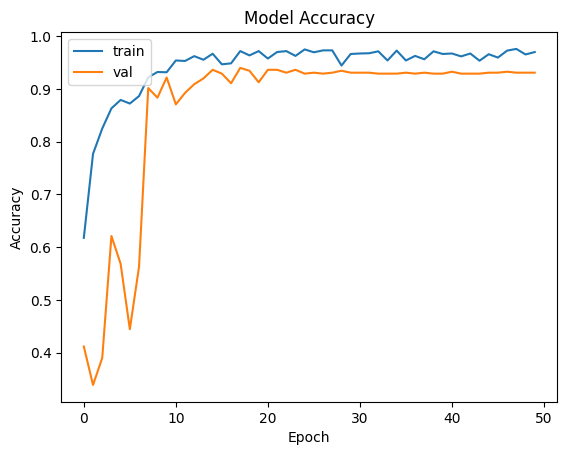

In [39]:
import matplotlib.pyplot as plt

plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

As we've learned throughout this process, you will eventually encounter diminishing or nonexistent returns, and unless you want to experiment over the course of several days with the maximum performance of a model, it is probably better to consider which layers, or hyperparameters you can adjust to increase the prediction potential of your model. After a certain point, you're basically just entering an exercise in overfitting.

### Augmented Data


Let's try now with some augmented data. We're going to have to start from square one here if we want to use the `ImageGenerator()`. We're going to split up our directories first:

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

data_dir = 'COVID-19_Radiography_Dataset'
train_dir = 'COVID-19_Radiography_Dataset/training'
val_dir = 'COVID-19_Radiography_Dataset/validation'
classes = ['COVID\\images', 'Normal\\images', 'Viral Pneumonia\\images']
train_ratio = 0.68

# Create training and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for diagnosis in classes:
   
    filenames = os.listdir(os.path.join(data_dir, diagnosis))

    # Split the filenames into training and validation sets
    train_filenames, val_filenames = train_test_split(filenames, train_size=train_ratio, random_state=1987)

    # Move the training files to the training directory
    for filename in train_filenames:
        src = os.path.join(data_dir, diagnosis, filename)
        dst = os.path.join(train_dir, diagnosis, filename)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)

    # Move the validation files to the validation directory
    for filename in val_filenames:
        src = os.path.join(data_dir, diagnosis, filename)
        dst = os.path.join(val_dir, diagnosis, filename)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)

Next, to set up the generator:

In [6]:
# Set our values

batch_size = 32
epochs = 10
IMG_HEIGHT = 192
IMG_WIDTH = 192

# Set up the generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

# Get set up for data augmentation

train_generator = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    batch_size=batch_size,
    class_mode='categorical',
)

val_generator = validation_image_generator.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

Found 10302 images belonging to 3 classes.
Found 4851 images belonging to 3 classes.


And take a look, using code borrowed from the example notebook:

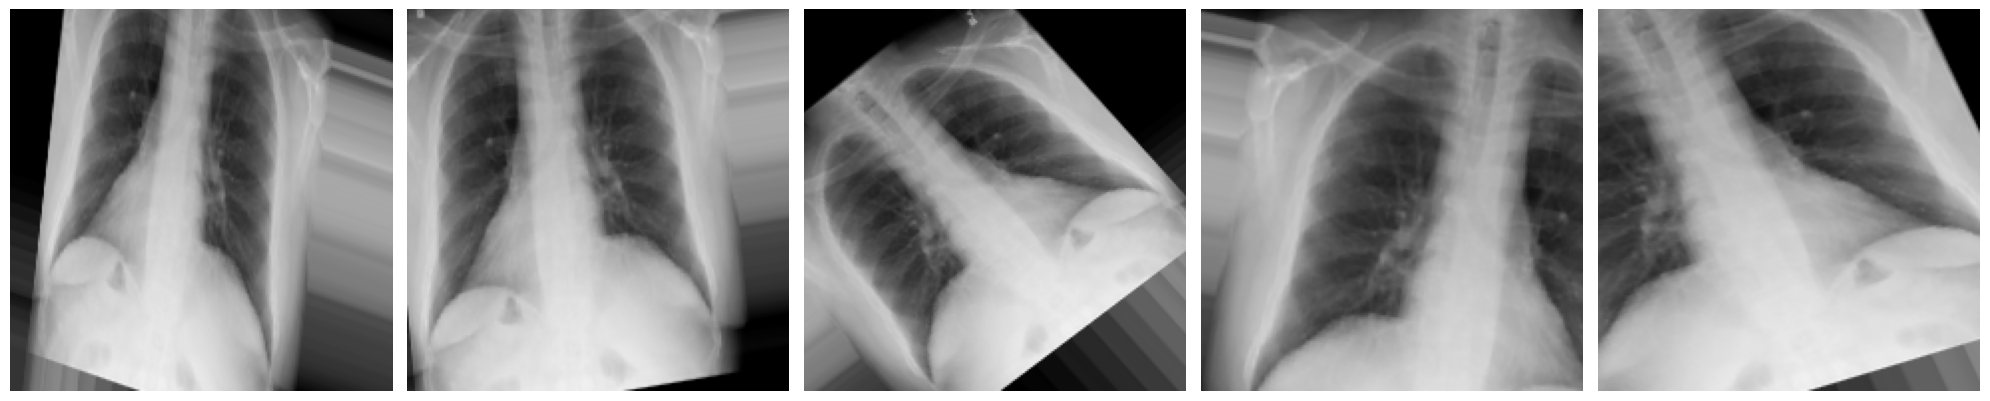

In [8]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

Okay, so now we can start getting our model set back up. First, we're gonna get the number of training and validation images available so we can replicate the method from the exemplar:

In [9]:
num_covid_tr = len(os.listdir('COVID-19_Radiography_Dataset\\training\\COVID\\images'))
num_pneumonia_tr = len(os.listdir('COVID-19_Radiography_Dataset\\training\\Viral Pneumonia\\images'))
num_normal_tr = len(os.listdir('COVID-19_Radiography_Dataset\\training\\Normal\\images'))

num_covid_val = len(os.listdir('COVID-19_Radiography_Dataset\\validation\\COVID\\images'))
num_pneumonia_val = len(os.listdir('COVID-19_Radiography_Dataset\\validation\\Viral Pneumonia\\images'))
num_normal_val = len(os.listdir('COVID-19_Radiography_Dataset\\validation\\Normal\\images'))

total_train = num_covid_tr + num_pneumonia_tr + num_normal_tr
total_val = num_covid_val + num_pneumonia_val + num_normal_val

And then we're going to re-load our prior model:

In [95]:
# Set our values

batch_size = 32
epochs = 10
IMG_HEIGHT = 192
IMG_WIDTH = 192


with tf.device('/device:GPU:0'): 

  model_seven.compile(
      optimizer="adam", 
      loss= 'categorical_crossentropy',
      metrics=['accuracy'])


  training_history_eight = model_seven.fit(
          train_generator,
          steps_per_epoch=1400 // 16, #adjusts training process for new image batches
          epochs=15,
          validation_data=val_generator,
          callbacks=[checkpoint, red_lr]
      )

model_seven.save("model_eight.h5", save_format="h5")

Epoch 1/15
87/87 [==============================] - 33s 370ms/step - loss: 0.8581 - accuracy: 0.6789 - val_loss: 6.9697 - val_accuracy: 0.6724 - lr: 0.0010
Epoch 2/15
87/87 [==============================] - 32s 363ms/step - loss: 0.6470 - accuracy: 0.7527 - val_loss: 0.4719 - val_accuracy: 0.8759 - lr: 0.0010
Epoch 3/15
87/87 [==============================] - 31s 360ms/step - loss: 0.5768 - accuracy: 0.7834 - val_loss: 4.4776 - val_accuracy: 0.6945 - lr: 0.0010
Epoch 4/15
87/87 [==============================] - 32s 363ms/step - loss: 0.5614 - accuracy: 0.7879 - val_loss: 2.0186 - val_accuracy: 0.6799 - lr: 0.0010
Epoch 5/15
87/87 [==============================] - ETA: 0s - loss: 0.5004 - accuracy: 0.8057
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
87/87 [==============================] - 32s 366ms/step - loss: 0.5004 - accuracy: 0.8057 - val_loss: 2.8570 - val_accuracy: 0.3717 - lr: 0.0010
Epoch 6/15
87/87 [==============================] - 32s 

In [35]:
model_eight = tf.keras.models.load_model('model_eight.h5',compile=False)

onnx_model = model_to_onnx(model_eight, framework='keras',
                          transfer_learning=True,
                          deep_learning=True)

with open("model_eight.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

prediction_column_index=model_eight.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "model_eight.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

41/41 [==============================] - 7s 91ms/step


C:\Users\Jackson\AppData\Roaming\Python\Python39\site-packages\aimodelshare\model.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append(metadata, ignore_index=True, sort=False)
C:\Users\Jackson\AppData\Roaming\Python\Python39\site-packages\aimodelshare\model.py:304: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  leaderboard['username']=leaderboard.pop("username")
C:\Users\Jackson\AppData\Roaming\Python\Python39\site-packages\aimodelshare\model.py:305: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 


Your model has been submitted as model version 322

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3340


In [46]:
model_eight = tf.keras.models.load_model('model_eight.h5',compile=True)

test_scores = model_eight.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

41/41 - 3s - loss: 0.3138 - accuracy: 0.8985 - 3s/epoch - 66ms/step
Test loss: 0.3138003647327423
Test accuracy: 0.8985282778739929


I submitted this model, but the leaderboard was glitching and I couldn't find my version. I would expect it fell into the 30-40 range based on the prediction accuracy from the above test-run.

In [44]:
# Return leaderboard
leaderboard = leaderboard.loc[:, ['accuracy', 'f1_score', 'precision', 'username', 'version']]
leaderboard[leaderboard['version'] == 322]

,accuracy,f1_score,precision,username,version


### What Have We Learned?

Of the things I learned from this project, the main thing was how much thought has to go into your changes and that progress is rarely linear. I struggled a lot initially with figuring out how to balance filters, hyperparameter changes, and data regularization/standardization techniques. With `Regularization`, for example, I added it in for all layers in a separate training session outside of this notebook since that was recommended in some sources I found online. But over several training attempts, I found that the best placement for this layer was the final `Conv2D` layer. With more time, I would've liked to see how more regularization and Pooling layers could have perhaps assisted my models that incorporated transfer learning.

I think my tinkering with `batch_size` was a great lesson in what you can reasonably expect from a tuning process in a neural net. Reducing the batch size did factor into my best-performing model, but I am not necessarily sure that it was the *main* reason for the performance gains. I made the adjustment to try and get more steps per epoch and greater granularity in the process; yet I am not sure if this increased variance was beneficial or happened to cohabitate well with my attempts to mitigate plateauing. Ultimately, I think it did help with this task where updating the weights frequently was both useful and efficient in terms of internal and validation accuracy.

Overall, successful models are built not just from a few well-tuned parameters, but also some critical thinking about the task at hand. Ultimately, we're taking fairly specific image data and attempting to generalize it to another pool of data with fairly specific features. Each class definitely had its gradients, as we saw from our exploration of different images from the training set. Our performance, though, generally increased most when we adjusted one parameter in particular: depth. Not just mindlessly, but in line with the architectures and approaches we discussed in class. Staggering filters and pooling layers is something we know to be effective, and there may be some tricks that work well (for example, my `AveragePooling` into `MaxPooling`) that work well even if you don't have a great explanation. Even with that baseline, improving beyond your brick wall in the low 90s% requires thinking carefully about what you need to generalize to, and the different layers or learning-rate adjustments that could help it learn both effectively *and* efficiently. So once you have your structure, ask not just if its deep enough, but also if you've maximized its potential at its current level. 